In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/facial-age-estimation/

Mounted at /content/drive
/content/drive/MyDrive/facial-age-estimation


In [2]:
import sys
sys.path.append('/content/drive/MyDrive/facial-age-estimation/src')

In [3]:
ls

data/  README.txt  requirements.txt  src/  weights/


In [4]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import os
from train.train_downstream import train_downstream
from evaluation.evaluate_downstream import evaluate_downstream
from config import AgeRegConfig
from models.vcop_head import VCOPN  # VCOP 모델 정의
from models.r21d_mini import MiniR2Plus1D  # encoder 정의

In [5]:
config = AgeRegConfig()
config.batch_size = 32
config.use_cuda = True
print(config.patience)

5


In [6]:
X_train = torch.load(config.train_X_path)
y_train = torch.load(config.train_y_path)
X_val = torch.load(config.val_X_path)
y_val = torch.load(config.val_y_path)
X_test = torch.load(config.test_X_path)
y_test = torch.load(config.test_y_path)

In [7]:
torch.cuda.empty_cache()

In [9]:
model = train_downstream(X_train, y_train, X_val, y_val, config)

[Epoch 1] Train Loss: 285.7113 | Val Loss: 354.3361
⏳ Warmup Epoch 1/5 - Early stopping 판단 보류
[Epoch 2] Train Loss: 191.3842 | Val Loss: 259.8487
⏳ Warmup Epoch 2/5 - Early stopping 판단 보류
[Epoch 3] Train Loss: 176.8632 | Val Loss: 333.9447
⏳ Warmup Epoch 3/5 - Early stopping 판단 보류
[Epoch 4] Train Loss: 168.1160 | Val Loss: 745.7001
⏳ Warmup Epoch 4/5 - Early stopping 판단 보류
[Epoch 5] Train Loss: 164.8063 | Val Loss: 304.6156
⏳ Warmup Epoch 5/5 - Early stopping 판단 보류
[Epoch 6] Train Loss: 160.7988 | Val Loss: 269.3142
✅ 모델 저장됨: age_regression.pth
[Epoch 7] Train Loss: 155.3462 | Val Loss: 271.5889
[Epoch 8] Train Loss: 154.2442 | Val Loss: 265.6236
✅ 모델 저장됨: age_regression.pth
[Epoch 9] Train Loss: 151.9379 | Val Loss: 281.0302
[Epoch 10] Train Loss: 147.7649 | Val Loss: 261.9858
✅ 모델 저장됨: age_regression.pth
[Epoch 11] Train Loss: 148.5834 | Val Loss: 294.5140
[Epoch 12] Train Loss: 147.7693 | Val Loss: 284.8013
[Epoch 13] Train Loss: 142.4369 | Val Loss: 275.1251
[Epoch 14] Train Loss: 

✅ 모델 가중치 로드됨: ./src/weights/age_regression.pth
📊 [Age Regression Evaluation]
   MAE:  16.25
   MSE:  416.05
   RMSE: 20.40


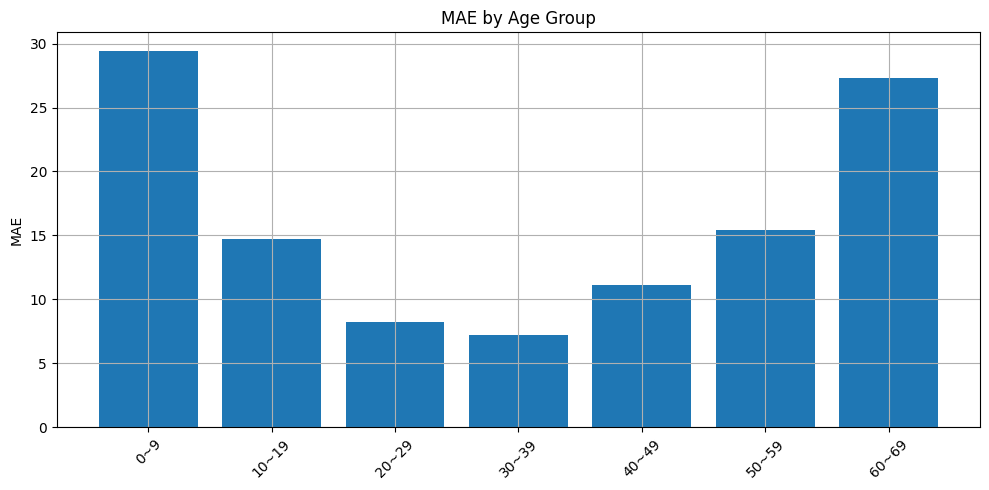

In [10]:
# 필요 모듈 import
import torch
from models.age_regressor import AgeRegressor
from models.r21d_mini import MiniR2Plus1D

# 디바이스 설정
device = torch.device("cuda" if config.use_cuda and torch.cuda.is_available() else "cpu")

# 모델 구성
base_encoder = MiniR2Plus1D()  # VCOP 사전학습된 구조와 동일하게
model = AgeRegressor(encoder=base_encoder, feature_dim=config.feature_size).to(device)

# ✅ 가중치 로드
model_path = config.model_path
model.load_state_dict(torch.load(model_path, map_location=device))
print(f"✅ 모델 가중치 로드됨: {model_path}")

# 평가 실행
evaluate_downstream(model, X_test, y_test, config)

In [ ]:
!pwd